# Meteorology

```{warning} This is not meant to be a standalone notebook.
This notebook is part of the process we have for adding entries to the NCL Index and is not meant to be used as tutorial or example code.
```

## Functions covered
- [dewtemp_trh](https://www.ncl.ucar.edu/Document/Functions/Built-in/dewtemp_trh.shtml)
- [daylight_fao56](https://www.ncl.ucar.edu/Document/Functions/Crop/daylight_fao56.shtml)
- [heat_index_nws](https://www.ncl.ucar.edu/Document/Functions/Contributed/heat_index_nws.shtml)

## NCL code

```{literalinclude} ../ncl_raw/meteorology.ncl

```

## Python Functionality

### dewtemp_trh

In [1]:
#### Collect NCL values for dewtemp_trh from geocat-datafiles
import geocat.datafiles as gdf
import numpy as np

dewtemp_data = gdf.get('applications_files/ncl_outputs/dewtemp_trh_output.txt')
dewtemp_data = np.loadtxt(dewtemp_data, delimiter=',', skiprows=6)

In [2]:
### Collect NCL `dewtemp` value and associated (temperature_kelvin, relative humidity) values
ncl_dewtemp = {}
tk_rh = tuple(map(tuple, dewtemp_data[::, 0:2]))
dewtemp_values = dewtemp_data[::, 2]
ncl_dewtemp = dict(zip(tk_rh, dewtemp_values))

In [3]:
### Collect Temperature (Kelvin) and Relative Humidity Pairs
tk_rh = []
for tk in range(273, 374 + 1):
    for rh in range(1, 100 + 1):
        tk_rh.append((tk, rh))

### Calculate GeoCAT-Comp `dewtemp` value and tk/rh
from geocat.comp import dewtemp

geocat_dewtemp = {}

for i, pair in enumerate(tk_rh):
    tk, rh = pair
    geocat_dewtemp[pair] = dewtemp(tk, rh) - 273.15

### daylight_fao56

In [4]:
#### Collect NCL values for daylight_fao56 from geocat-datafiles
import geocat.datafiles as gdf
import numpy as np

daylight_data = gdf.get('applications_files/ncl_outputs/daylight_fao56_output.txt')
daylight_data = np.loadtxt(daylight_data, delimiter=',', skiprows=6)

In [5]:
### Collect NCL `daylight_fao56` value and associated (doy, latitude) values
ncl_daylight = {}
doy_lat = tuple(map(tuple, daylight_data[::, 0:2]))
daylight_values = daylight_data[::, 2]
ncl_daylight = dict(zip(doy_lat, daylight_values))

In [6]:
### Collect DOY and Latitude Pairs
doy_lat = []
for doy in range(0, 365 + 1):
    for lat in range(-66, 66 + 1):
        doy_lat.append((doy, lat))

### Calculate GeoCAT-Comp `daylight_fao56` value and doy/lat
from geocat.comp import max_daylight

geocat_daylight = {}

for i, pair in enumerate(doy_lat):
    doy, lat = pair
    geocat_daylight[pair] = max_daylight(doy, lat).flatten()[0]

/home/user/miniconda3/envs/wavelet_tutorial/lib/python3.11/site-packages/geocat/comp/meteorology.py:1058: UserWarning: WARNING: max_daylight has limited validity for abs(lat) > 55 
  warnings.warn(


### heat_index_nws 

In [7]:
#### Collect NCL values for heat_index_nws from geocat-datafiles
import geocat.datafiles as gdf
import numpy as np

# heat_index_data = gdf.get('applications_files/ncl_outputs/heat_index_nws_output.txt')
heat_index_data = np.loadtxt("heat_index_nws_output.txt", delimiter=',', skiprows=6)

In [8]:
### Collect NCL `heat_index_nws` value and associated (temperature, relative humidity, alternate_coeffs) values
ncl_heat_index = {}
temp_rh_coefs = tuple(map(tuple, heat_index_data[::, 0:3]))
heat_index_values = heat_index_data[::, 3]
ncl_heat_index = dict(zip(temp_rh_coefs, heat_index_values))

In [9]:
### Calculate GeoCAT-Comp `heat_index_nws` value and temp/rh
from geocat.comp import heat_index

geocat_heat_index = {}

for key in ncl_heat_index.keys():
    temp, rh, alt_coeffs = key
    geocat_heat_index[key] = heat_index(temp, rh, alt_coeffs).flatten()[0]

/home/user/miniconda3/envs/wavelet_tutorial/lib/python3.11/site-packages/geocat/comp/meteorology.py:125: RuntimeWarning: invalid value encountered in sqrt
  heatindex - ((13 - relative_humidity) / 4) * np.sqrt(


## Comparison

### dewtemp_trh

In [10]:
import math

for pair in ncl_dewtemp.keys():
    try:
        assert math.isclose(
            ncl_dewtemp[pair], geocat_dewtemp[pair], rel_tol=1e-04
        )  # within 4 decimal points
    except Exception:
        assert math.isclose(
            ncl_dewtemp[pair], geocat_dewtemp[pair], rel_tol=1e-02
        )  # within 2 decimal points
        print(f"{pair}:")
        print(f"\t{ncl_dewtemp[pair]}, {geocat_dewtemp[pair]}")
        print(f"\tDifference: {ncl_dewtemp[pair] - geocat_dewtemp[pair]}")

(274.0, 94.0):
	-0.0055542, -0.005570036309563875
	Difference: 1.5836309563875377e-05
(275.0, 87.0):
	-0.0839233, -0.08393959272956408
	Difference: 1.6292729564076902e-05
(275.0, 88.0):
	0.073761, 0.07374617196580857
	Difference: 1.482803419142198e-05
(277.0, 76.0):
	0.00259399, 0.0025903565796738803
	Difference: 3.633420326119678e-06
(278.0, 71.0):
	0.0261536, 0.026158530424595483
	Difference: -4.930424595483984e-06
(279.0, 66.0):
	-0.0278931, -0.027897415813697535
	Difference: 4.3158136975342265e-06
(281.0, 58.0):
	0.0712891, 0.07128017477202775
	Difference: 8.925227972245153e-06
(282.0, 54.0):
	0.0129395, 0.01291856405322278
	Difference: 2.0935946777218828e-05
(283.0, 50.0):
	-0.130432, -0.13044636060385528
	Difference: 1.4360603855290144e-05
(283.0, 51.0):
	0.144928, 0.14490829422311435
	Difference: 1.9705776885647897e-05
(284.0, 47.0):
	-0.0726318, -0.07262340593854333
	Difference: -8.39406145666799e-06
(285.0, 44.0):
	-0.0798035, -0.07982300528288988
	Difference: 1.95052828898811

### daylight_fao56

In [11]:
for pair in ncl_daylight.keys():
    assert math.isclose(
        ncl_daylight[pair], geocat_daylight[pair], rel_tol=1e-05
    )  # within 5 decimal points

### heat_index_nws

In [12]:
difference_from_ncl = 0
diff_0 = []
diff_1 = []
coeff_type = []
for key in ncl_heat_index.keys():
    temp, rh, alt_coeffs = key
    try:
        assert ncl_heat_index[key] == geocat_heat_index[key]
    except Exception:
        try:
            assert ncl_heat_index[key] - geocat_heat_index[key] <= 2
        except Exception:
            difference_from_ncl += 1
            if alt_coeffs == 0:
                diff_0.append(ncl_heat_index[key] - geocat_heat_index[key])
            if alt_coeffs == 1:
                diff_1.append(ncl_heat_index[key] - geocat_heat_index[key])
            coeff_type.append(alt_coeffs)
print(
    f"Mismatch between NCL and GeoCAT greater than 2° = {difference_from_ncl/len(ncl_heat_index)*100}% ({difference_from_ncl}/{len(ncl_heat_index)})"
)

Mismatch between NCL and GeoCAT greater than 2° = 6.349137931034483% (1473/23200)


[Text(0, 0, '48'), Text(0, 0, '1425')]

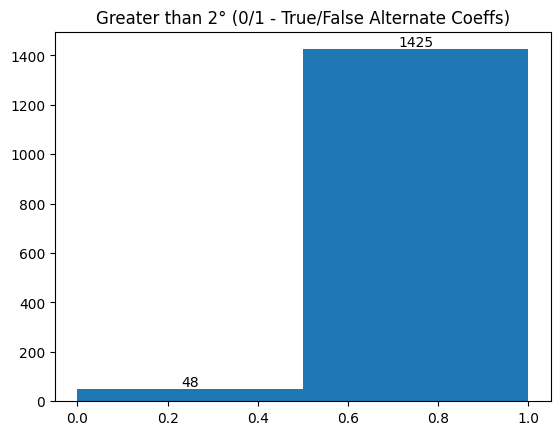

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
counts, edges, bars = plt.hist(coeff_type, range=[0, 1], bins=2)
plt.title("Greater than 2° (0/1 - True/False Alternate Coeffs)")
plt.bar_label(bars)

[Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5')]

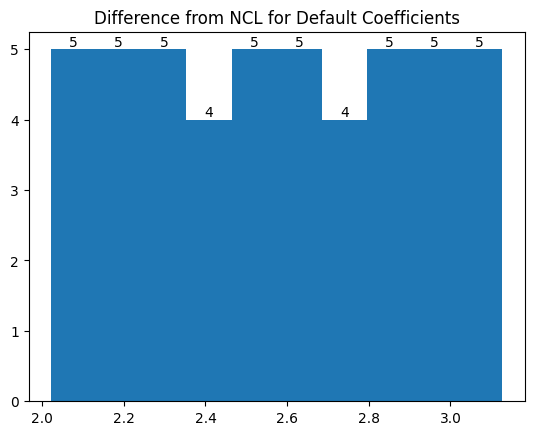

In [20]:
fig, ax = plt.subplots()
counts, edges, bars = plt.hist(diff_0)
plt.title("Difference from NCL for Default Coefficients")
plt.bar_label(bars)

[Text(0, 0, '872'),
 Text(0, 0, '166'),
 Text(0, 0, '119'),
 Text(0, 0, '85'),
 Text(0, 0, '63'),
 Text(0, 0, '45'),
 Text(0, 0, '33'),
 Text(0, 0, '22'),
 Text(0, 0, '14'),
 Text(0, 0, '6')]

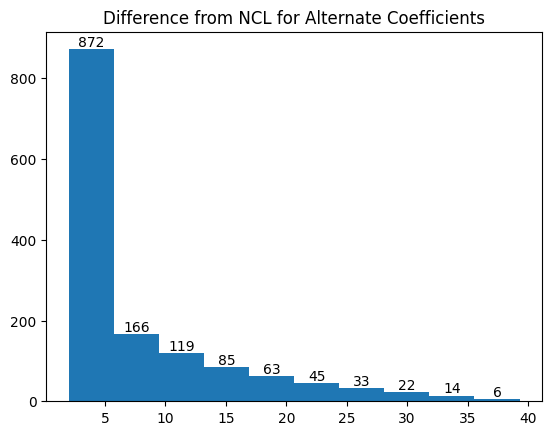

In [21]:
fig, ax = plt.subplots()
counts, edges, bars = plt.hist(diff_1)
plt.title("Difference from NCL for Alternate Coefficients")
plt.bar_label(bars)